# Caribbean meteor Dst index

Although I already have a Dst index python script, I need to make a graph where the Dst index until the event day, or the Dst index of the whole month (which may be the best option).

In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = open("./Dst_index/Dst-index-06-2019.txt", "r")

In [3]:
print(f.readline())
print(f.readline())
print(f.readline())
f.readline()
f.readline()
f.readline()
raw_data = f.readlines();

                                       WDC for Geomagnetism, Kyoto

                                Hourly Equatorial Dst Values (PROVISIONAL)

                                               JUNE   2019



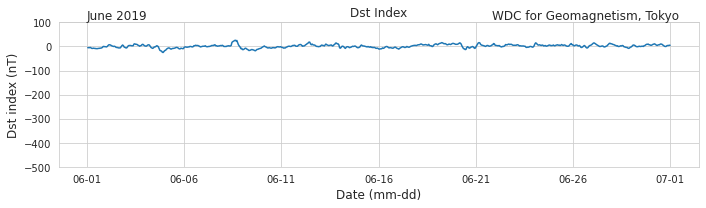

In [7]:
Dst_tab = Table.read(raw_data, format="ascii")
day = Dst_tab["col1"]
Dst = []
time = np.arange(1, 24*30+1)

for i, d in enumerate(day):
    for key in Dst_tab.keys()[1:]:
        Dst.append(Dst_tab[key][i])
sns.set_style("whitegrid")
plt.plot(time, Dst)
plt.ylim(-500, 100)
xticklabels = ["06-01", "06-06", "06-11", "06-16", "06-21", "06-26", "07-01"]
xticks = [0, 24*5, 24*10, 24*15, 24*20, 24*25, 720]
plt.xticks(xticks, xticklabels, fontsize="medium")
plt.title("Dst Index", fontsize="large")
plt.xlabel("Date (mm-dd)", fontsize="large")
plt.ylabel("Dst index (nT)", fontsize="large")
plt.text(0, 115, "June 2019", fontsize="large")
plt.text(500, 115, "WDC for Geomagnetism, Tokyo", fontsize="large")
plt.gcf().set_size_inches(10, 3)
plt.tight_layout()
plt.savefig("./paper/figures/caribbean-Dst-index.pdf")